# 🧠 Student Score Prediction **Project**

Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

📥 Step 2: Load Dataset


In [2]:
df = pd.read_csv("StudentsPerformance.csv")

# Simulate study hours (normally not in this dataset)
np.random.seed(42)
df['study_hours'] = np.round(np.random.normal(loc=5, scale=2, size=len(df)), 1)
df['study_hours'] = df['study_hours'].clip(1, 10)  # limit between 1 and 10

# Calculate final score as average
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,final_score
0,female,group B,bachelor's degree,standard,none,72,72,74,6.0,72.666667
1,female,group C,some college,standard,completed,69,90,88,4.7,82.333333
2,female,group B,master's degree,standard,none,90,95,93,6.3,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,8.0,49.333333
4,male,group C,some college,standard,none,76,78,75,4.5,76.333333


 Step 3: Data Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Basic stats
print(df[['study_hours', 'final_score']].describe())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
study_hours                    0
final_score                    0
dtype: int64
       study_hours  final_score
count  1000.000000  1000.000000
mean      5.044700    67.770667
std       1.917908    14.257326
min       1.000000     9.000000
25%       3.700000    58.333333
50%       5.050000    68.333333
75%       6.300000    77.666667
max      10.000000   100.000000


📊 Step 4: Visualization

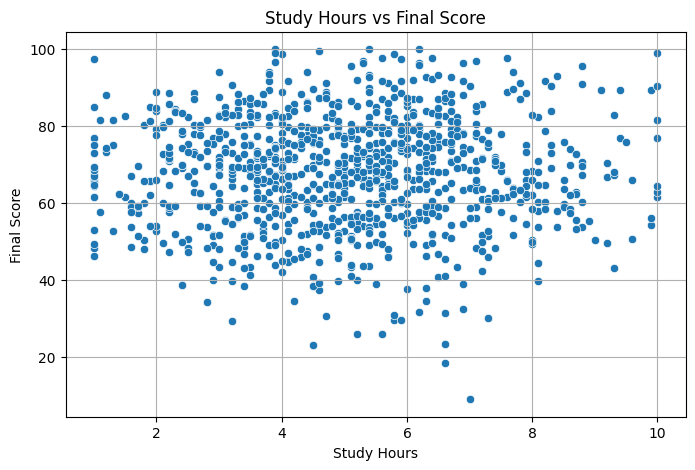

In [4]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='study_hours', y='final_score', data=df)
plt.title('Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.grid()
plt.show()


🔀 Step 5: Split Dataset

In [5]:
X = df[['study_hours']]
y = df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🤖 Step 6: Train Linear Regression Mode

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 67.30114826358994
Coefficient: 0.1715832874061365


📈 Step 7: Visualize Predictions

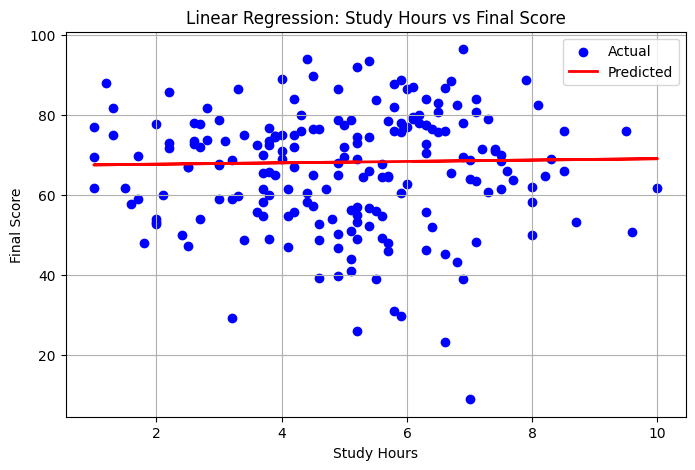

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.legend()
plt.grid()
plt.show()


🧮 Step 8: Evaluate Model

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 218.46
R2 Score: -0.02


 Bonus: Polynomial Regression

In [9]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

y_pred_p = poly_model.predict(X_test_p)

# Evaluate
mse_p = mean_squared_error(y_test_p, y_pred_p)
r2_p = r2_score(y_test_p, y_pred_p)

print(f"Polynomial Regression MSE: {mse_p:.2f}")
print(f"Polynomial Regression R2: {r2_p:.2f}")


Polynomial Regression MSE: 218.67
Polynomial Regression R2: -0.02


📉 Compare Performance

In [10]:
print("Linear Regression vs Polynomial Regression (degree=2)")
print(f"Linear MSE: {mse:.2f}, R2: {r2:.2f}")
print(f"Polynomial MSE: {mse_p:.2f}, R2: {r2_p:.2f}")


Linear Regression vs Polynomial Regression (degree=2)
Linear MSE: 218.46, R2: -0.02
Polynomial MSE: 218.67, R2: -0.02
